# TP Introduction to linear regression

Imports necessary packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


# NOTE:
If needed, a tutorial on __pandas__ can be helpful: http://pandas.pydata.org/pandas-docs/stable/tutorials.html
Let us use the __Investment Data Set__ (see Greene (2012) - Econometric Analysis, Prentice Hall, Upper Saddle River, NJ). downloadable from the institution web site as a CSV (blank separated) file __''invest.txt''__.

Before going to the Steps of this tutorial, please take a look at the preceding it preliminary part, which suggests a declarative overview of several notions connected to the linear regression model.

# Q1. Import the data 
Import the data from the file __''invest.txt''__ and print them in a readable form, e.g. a table containing first $5$ observations.

In [2]:
path = './invest.txt'
invest = pd.read_csv(path, sep = ' ')
invest.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


# Q2. Plot the data 
Plot the data with Gross National Product (GNP, column __''gnp''__) being the abscissa and Investment (column __''invest''__) being the ordinate.

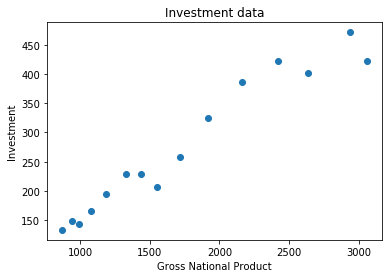

In [3]:
plt.figure()
plt.scatter(invest['gnp'], invest['invest'])
plt.title('Investment data')
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.show()

Log-transform:

In [4]:
X = np.asarray(np.log(invest['gnp']))
Y = np.asarray(np.log(invest['invest']))

# NOTE:
When working with monetary data, one often resorts to a logarithm transform to account for inequality of scale. First, transform the two above mentioned columns, GNP and Investment, via logarithm; further in this exercise we will be working with these columns log-transformed. In Steps 3-6, all the calculations should be done with elementary arithmetic and not involving existing libraries for running linear regression.

# Q3. linear regression of Investment on GNP
For the linear regression of Investment on GNP, estimate the intercept and the slope and their standard deviations, as well as the determination coefficient for the ordinary least squares. Output them in a readable form.

In [5]:
n = len(X)
X_bar = np.mean(X)
Y_bar = np.mean(Y)
X_var = np.sum((X - X_bar) ** 2)

# Coefficients (see exercise 12, q.1)
b1 = np.sum((X - X_bar) * (Y - Y_bar)) / X_var
b0 = Y_bar - b1 * X_bar

# Standard deviations of the coefficients (see exercise 12, q.3)
Y_pred = b0 + b1 * X
resid = Y - Y_pred
s2 = np.sum(resid ** 2) / (n - 2)

sd_b0 = np.sqrt(s2 * (1. / n + X_bar ** 2 / X_var))
sd_b1 = np.sqrt(s2 / X_var)

print('Estimated parameters are:')
print('b0 = {:.4f} with sd = {:.4f},'.format(b0, sd_b0))
print('b1 =  {:.4f} with sd = {:.4f}.'.format(b1, sd_b1))

# R^2 coefficient
SSR = np.sum((Y_bar - Y_pred) ** 2)
SST = np.sum((Y - Y_bar) ** 2)
Rsq = SSR / SST

print('\nDetermination coefficient R^2 = {:.4f}.'.format(Rsq))

Estimated parameters are:
b0 = -1.9636 with sd = 0.4095,
b1 =  1.0153 with sd = 0.0554.

Determination coefficient R^2 = 0.9628.


# Q4. Test the significance of the slope 
Test the significance of the slope using the Student-$t$ test. Report the value of the test statistic and the $p$-value.

In [6]:
def t_p_value(t_stat, deg):
    # compute the p-value if t_stat follows a Student of degree deg
    p_val = (1 - stat.t.cdf(abs(t_stat), deg)) * 2
    return p_val


tStudent = b1 / sd_b1
p_value1 = t_p_value(tStudent, n - 2)

print('The Student\'s t-test for H0: b1 = 0 returns the value of the test statistic')
print('t = {:.4f} with the p-value {:.4e}.'.format(tStudent, p_value1))

# tFisher = np.sum((b1 * X + b0 - Y_bar) ** 2) / s2
# p_value2 = f_p_value(tFisher, 1, n - 2)

# print('\nThe F-test returns the value of the statistic')
# print('F = {:.4f} with the p-value {:.4e}.'.format(tFisher, p_value2))

The Student's t-test for H0: b1 = 0 returns the value of the test statistic
t = 18.3320 with the p-value 1.1364e-10.


# Q5. Confidence intervals
For the GNP value $1000$, estimate the necessary Investment, provide confidence and prediction intervals for the $90\%$ level.

In [7]:
def V_conf(x):
    # return the explained variable variance (see exercise 12, q.5)
    vconf = s2 * (1. / n + (x - X_bar) ** 2 / X_var)
    return vconf

def V_pred(x):
    # return the prediction variance (see exercise 12, q.5)
    vpred = s2 + V_conf(x)
    return vpred

def t_I_conf(alpha, deg):
    # return the confidence interval at level alpha for Student of degree deg
    I = [(1 - alpha) / 2., 1 - (1 - alpha) / 2.]
    t_I = stat.t.ppf(I, deg)
    return t_I


alpha = 0.9
x0 = 1000

# New point
ln_x0 = np.log(x0)
ln_y0 = b0 + b1 * ln_x0

# Confidence intervals
ln_y0_conf = ln_y0 + t_I_conf(alpha, n - 2) * np.sqrt(V_conf(ln_x0))
ln_y0_pred = ln_y0 + t_I_conf(alpha, n - 2) * np.sqrt(V_pred(ln_x0))

print('For GNP = {} point prediction of Investment = {:.4f},'
      .format(x0, np.exp(ln_y0)))

print('confidence interval at the level {:.1f} is [{:.4f}, {:.4f}],'
      .format(alpha, np.exp(ln_y0_conf[0]), np.exp(ln_y0_conf[1])))

print('prediction interval at the level {:.1f} is [{:.4f}, {:.4f}].'
      .format(alpha, np.exp(ln_y0_pred[0]), np.exp(ln_y0_pred[1])))

For GNP = 1000 point prediction of Investment = 155.9794,
confidence interval at the level 0.9 is [146.6755, 165.8735],
prediction interval at the level 0.9 is [132.0024, 184.3117].


# Q6. Plot (with logarithmic axes)
On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the estimated regression line, the confidence and prediction intervals for all values of log(GNP) between its minimum and maximum in the data set.

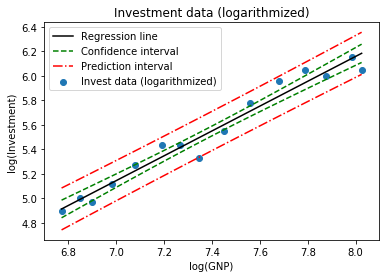

In [8]:
# Plot range
xs = np.linspace(np.min(X), np.max(X), 100)
ys = b0 + b1 * xs

# Confidence intervals
ys_conf_lwr, ys_conf_upr = ys + t_I_conf(alpha, n - 2)[:, None] * np.sqrt(V_conf(xs))[None, :]
ys_pred_lwr, ys_pred_upr = ys + t_I_conf(alpha, n - 2)[:, None] * np.sqrt(V_pred(xs))[None, :]

# Plot
plt.figure()
pts_data = plt.scatter(X, Y, label='Invest data (logarithmized)')
plt.plot(xs, ys, c='k', label='Regression line')
plt.plot(xs, ys_conf_lwr, 'g--', label='Confidence interval')
plt.plot(xs, ys_conf_upr, 'g--')
plt.plot(xs, ys_pred_lwr, 'r-.', label='Prediction interval')
plt.plot(xs, ys_pred_upr, 'r-.')
plt.title('Investment data (logarithmized)')
plt.xlabel('log(GNP)')
plt.ylabel('log(Investment)')
plt.legend()
plt.show()

# Q7. Regression using existing functionality
Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value $1000$ using existing functionality. The class __LinearRegression()__ from __sklearn.linear_model__ is suggested but not obligatory; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated 'by hand' (Steps 3 and 5) coincide with the ones obtained using existing implementation.

In [9]:
linmod = linear_model.LinearRegression()
linmod.fit(X.reshape(-1, 1), Y)

print('Using "sklearn"\'s "linear_model", the estimated parameters are:')
print('b0 = {:.4f},'.format(linmod.intercept_))
print('b1 = {:.4f}.'.format(linmod.coef_[0]))

print('\nDetermination coefficient R^2 = {:.4f}.'
      .format(linmod.score(X.reshape(-1, 1), Y)))

y0 = linmod.predict(np.log(x0).reshape(-1, 1))[0]
print('\nFor GNP = {}, point prediction of Investment = {:.4f}.'.format(x0, np.exp(y0)))

(15,)
Using "sklearn"'s "linear_model", the estimated parameters are:
b0 = -1.9636,
b1 = 1.0153.

Determination coefficient R^2 = 0.9628.

For GNP = 1000, point prediction of Investment = 155.9794.


# Q8. Plot using existing functionality
On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the regression line and the predicted point (in a different color). The graphic should coincide with the corresponding elements from the one in Step 6.

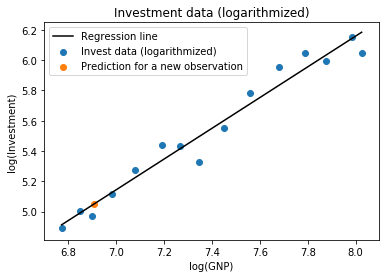

In [10]:
Y_pred = linmod.predict(X.reshape(-1, 1))

plt.figure()
plt.scatter(X, Y, label='Invest data (logarithmized)')
plt.scatter(np.log(x0), y0, label='Prediction for a new observation')
plt.plot(X, Y_pred, c='k', label='Regression line')
plt.title('Investment data (logarithmized)')
plt.xlabel('log(GNP)')
plt.ylabel('log(Investment)')
plt.legend()
plt.show()

# NOTE:
Further, consider an additional explanatory variable, namely Interest (column __''interest''__, without a logarithmic transform). In Steps 9-12, all the calculations should be done with elementary arithmetic and not involving existing libraries for running linear regression. (Use function __inv__ from __numpy.linalg__ for inversion of a matrix (= two-dimensional __numpy__-array) and function __eig__ from the same package for calculating its eigenvalues.)

# Q9. Mutidimensional regression
Now we consider the linear regression of Investment on GNP and Interest. Compute the associated Gram matrix. Is it of full rank?

In [11]:
# Warning, X is now a matrix containing the intercept and 2 variables
X = np.array([np.ones(n), X, invest['interest']]).T
G = X.T @ X / n
lamb, _ = np.linalg.eigh(G) # eigh more precise when G is Hermitian

print("The eigenvalues of the Gram matrix are {}".format(lamb))
print("Is the Gram matrix invertible? {}".format((lamb > 1e-10).all()))

The eigenvalues of the Gram matrix are [1.21579798e-03 2.74760242e+00 1.15858127e+02]
Is the Gram matrix invertible? True


# Q10. Estimate regression coefficients 
For the linear regression of Investment on GNP and Interest, estimate the three regression coefficients and their standard deviations, as well as the determination coefficient for the ordinary least squares. Additionally, test significance of each coefficient using the Student-$t$ test. Report the regression coefficients, corresponding to them $p$-values, and the determination coefficient in a readable form. Discuss significance of the estimated regression coefficients.

In [12]:
G_inv = np.linalg.inv(G * n)
b = G_inv @ X.T @ Y

# Computing the t-stats
SSE = Y @ (np.eye(n) - X @ G_inv @ X.T) @ Y
sSq = SSE / (n - 3)
sSqXX = sSq * G_inv
tss = b / np.sqrt(np.diag(sSqXX))

print('Estimated parameters are:')
for i in range(3):
    print('b{} = {:.4f} with the significance p-value = {:1.4e},'
          .format(i, b[i], t_p_value(tss[i], n - 3)))

SST = Y @ (np.eye(n) - 1. / n * np.ones((n, n))) @ Y
Rsq = 1 - SSE / SST

print('\nDetermination coefficient R^2 = {:.4f}.'.format(Rsq))

Estimated parameters are:
b0 = -2.1805 with the significance p-value = 6.4384e-03,
b1 = 1.0512 with the significance p-value = 2.5995e-07,
b2 = -0.0065 with the significance p-value = 6.7801e-01,

Determination coefficient R^2 = 0.9633.


Different to GNP Interest (b2) seems to be insignificant for explaining Investment.

# Q11. Confidence intervals
For the values of GNP $=1000$ and Interest $=10$, predict the log(Investment) and provide confident and prediction intervals at the $99.9\%$ level.

In [13]:
# Same warning as for X
x0 = np.array([1., np.log(x0), 10.])
alpha2 = 0.999
y0 = b @ x0

y0confL, y0confU = y0 + t_I_conf(alpha2, n - 3) * np.sqrt(sSq * (x0 @ G_inv @ x0))
y0predL, y0predU = y0 + t_I_conf(alpha2, n - 3) * np.sqrt(+ sSq * (1 + (x0 @ G_inv @ x0)))

print('Prediction of log(invest) for (gnp, interest) = ({}, {}) is {:.4f},'
      .format(1000, 10, y0))

print('with confidence interval at the level {} being [{:.4f}, {:.4f}],'
      .format(alpha2, y0confL, y0confU))

print('and  prediction interval at the level {} being [{:.4f}, {:.4f}].'
      .format(alpha2, y0predL, y0predU))

Prediction of log(invest) for (gnp, interest) = (1000, 10) is 5.0160,
with confidence interval at the level 0.999 being [4.6402, 5.3918],
and  prediction interval at the level 0.999 being [4.4738, 5.5582].


# Q12. 3D-plot
On a same 3D-plot with axes being log(GNP), Interest, and log(Invetment), draw data points, their predictions, regression plane and surfaces of the $99.9\%$ confidence intervals for each pair of values of log(GNP) and Interest between their minimum and maximum.

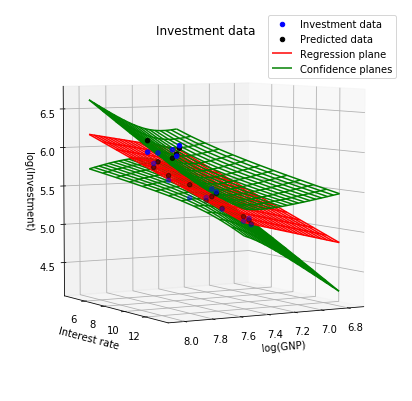

In [14]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 60)

# Data points
ax.scatter(X[:, 1], X[:, 2], Y, c='b', label='Investment data')

# Predicted points
predY = X @ b
ax.scatter(X[:, 1], X[:, 2], predY, c='k', label='Predicted data')

# Regression plane
xs3drange = np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.1)
ys3drange = np.arange(np.min(X[:, 2]), np.max(X[:, 2]), 0.5)
xs3d, ys3d = np.meshgrid(xs3drange, ys3drange)

surf3d = b[0] + b[1] * xs3d + b[2] * ys3d
ax.plot_wireframe(xs3d, ys3d, surf3d, color='r', label='Regression plane')

# Confidence planes
extX = np.array([np.ones(xs3d.shape[0] * xs3d.shape[1]), xs3d.ravel(), ys3d.ravel()]).T

conf = np.sqrt(sSq * np.sum(((extX @ G_inv) * extX).T, axis=0)).reshape(len(xs3d), len(xs3d[0]))

confLowY, confUppY = surf3d + t_I_conf(alpha2, n - 3)[:, None, None] * conf[None, :, :]

ax.plot_wireframe(xs3d, ys3d, confLowY, color='g', label='Confidence planes')
ax.plot_wireframe(xs3d, ys3d, confUppY, color='g')

ax.set_title('Investment data')
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest rate')
ax.set_zlabel('log(Investment)')
ax.legend()
plt.show()

# Q 13. Regression using existing functionality
Estimate the regression and determination coefficients and predict the necessary log(Investment) for GNP $=1000$ and Interest $=10$ using existing functionality. Again, the class __LinearRegression()__ from __sklearn.linear_model__ is suggested but not obligatory; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated 'by hand' (Steps 10 and 11) coincide with the ones obtained using existing implementation.

In [15]:
lin_reg = linear_model.LinearRegression(fit_intercept=False)
lin_reg.fit(X, Y)

print('Using "sklearn"\'s "linear_model" one obtains:\n')
print('Estimated parameters are:')
for i in range(3):
    print('b{} = {:.4f},'.format(i, lin_reg.coef_[i]))

print('\nDetermination coefficient R^2 = {:.4f}.\n'.format(lin_reg.score(X, Y)))

y0 = lin_reg.predict(x0.reshape(1, -1))[0]

print('Prediction of log(invest) for (gnp, interest) = ({}, {}) is {:.3f}.'
      .format(1000, x0[2], y0))

Using "sklearn"'s "linear_model" one obtains:

Estimated parameters are:
b0 = -2.1805,
b1 = 1.0512,
b2 = -0.0065,

Determination coefficient R^2 = 0.9633.

Prediction of log(invest) for (gnp, interest) = (1000, 10.0) is 5.016.
